# Policy Gradients
In this notebook, we will look about policy gradient algorithms and implement them in some of mujoco gym environments.

In [1]:
import torch
from torch import nn
import torch.nn.functional as F
from torch import distributions
from torch import optim
from VPGagent import VPGAgent
import gym
import matplotlib.pyplot as plt
import numpy as np

In [2]:
env = gym.make("Walker2d-v2")
env.reset()
print(env.observation_space.shape)
print(env.action_space.shape)
print(env.action_space.sample())
print(env.reward_range)


(17,)
(6,)
[ 0.88084364  0.9280526   0.05999215 -0.21422012 -0.15024425  0.18658368]
(-inf, inf)


In [3]:
observation = env.reset()
print(type(env.observation_space))
observation = torch.from_numpy(observation)
observation = torch.reshape(observation, (observation.shape[0],))
print(observation.shape)

<class 'gym.spaces.box.Box'>
torch.Size([17])


In [4]:
agent_params = {
"Gamma": 0.99,
"LR": 2e-4,
"num_episodes":2000,
"num_timesteps":1000}

In [5]:
agent_params['policy_params'] = {
    "input_size" : int(env.observation_space.shape[0]),
    "output_size" : int(env.action_space.shape[0]),
    "net_params" : [16, 16, 16, 8, 8, 8]
}

In [6]:
agent_params['value_params'] = {
    "input_size" : int(env.observation_space.shape[0]),
    "output_size" : 1,
    "net_params" : [16, 16, 16, 8, 8, 8, 4, 4, 2]
}

In [7]:
agent = VPGAgent(agent_params, env)

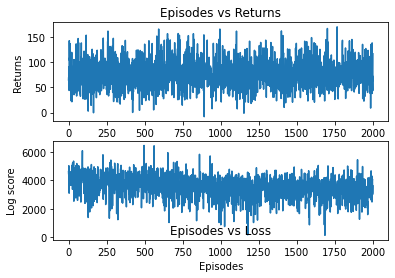

In [8]:
observations, actions, rewards, loss = agent.train(True)
agent.plot()

In [9]:
#Eval
rewards = agent.eval(5000)
#print(rewards)

Creating window glfw
